# Random Forest para tarefas de classificação e regressão

**Motivação** <br>
• RF de classificação<br>
•RF de regressão<br>
•Importância das variáveis<br>
•Avaliação dos modelos<br>
•Você pode visualizar sua floresta?

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("dados_investpy.csv", sep = ",")
dol.shape

(4274, 19)

In [3]:
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

0

<AxesSubplot:>

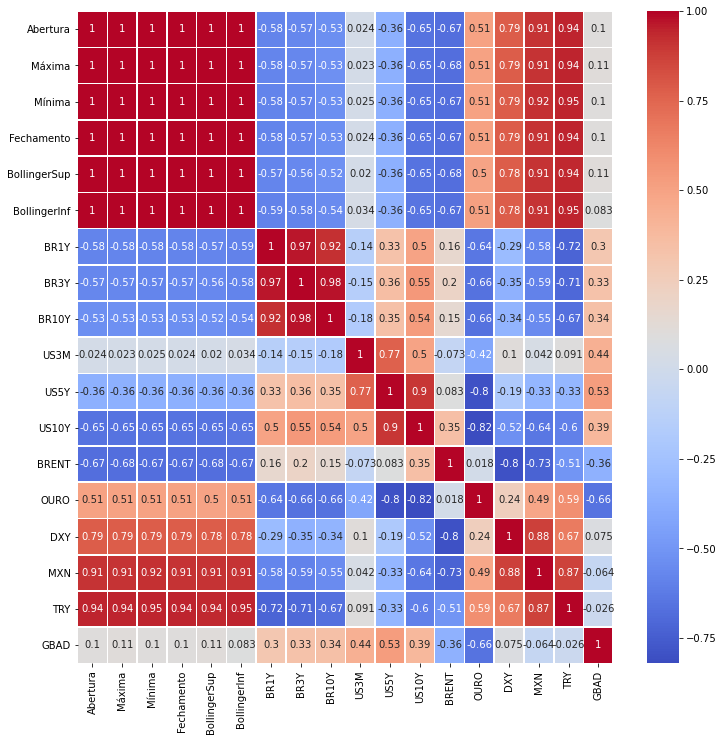

In [4]:
correlX = dol.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlX, cmap ="coolwarm", annot = True, linewidth=.6, ax=ax)

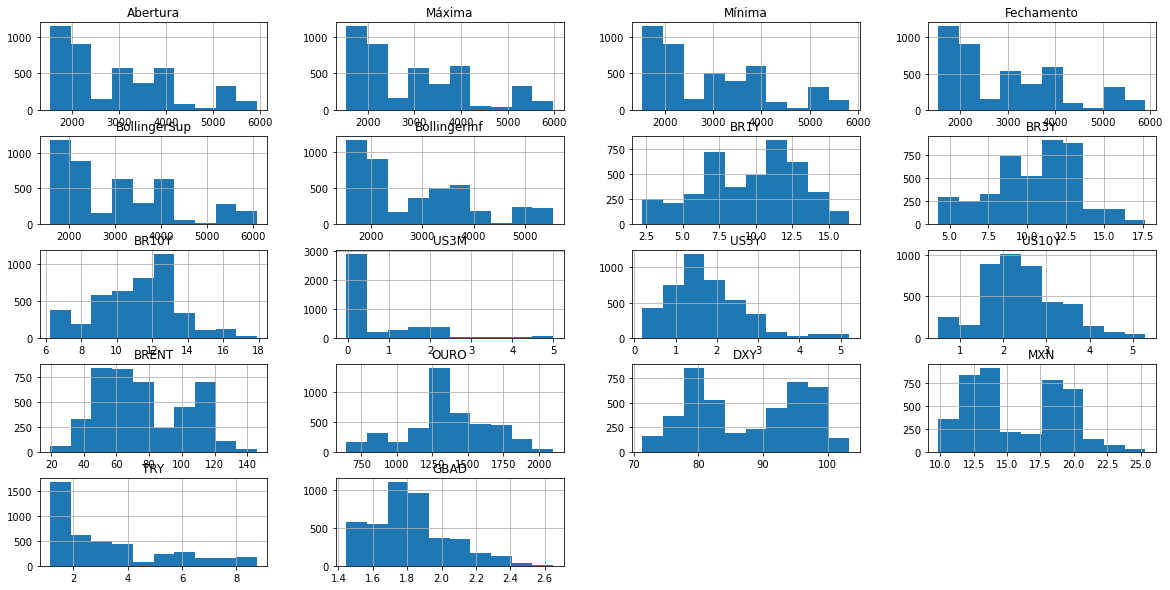

In [5]:
dol.hist()
plt.gcf().set_size_inches(20,10)

In [19]:
dol["BR1Z5"]  = (dol["BR1Y"].rolling(5).std())
dol["BR1Z20"] = (dol["BR1Y"].rolling(20).std())
dol["BR1Z50"] = (dol["BR1Y"].rolling(50).std())

dol["BR3YZ5"]  = (dol["BR3Y"].rolling(5).std())
dol["BR3YZ20"] = (dol["BR3Y"].rolling(20).std())
dol["BR3YZ50"] = (dol["BR3Y"].rolling(50).std())

dol["BR10Z5"]  = (dol["BR10Y"].rolling(5).std())
dol["BR10Z20"] = (dol["BR10Y"].rolling(20).std())
dol["BR10Z50"] = (dol["BR10Y"].rolling(50).std())

dol["US3MZ5"]  = (dol["US3M"].rolling(5).std())
dol["US3MZ20"] = (dol["US3M"].rolling(20).std())
dol["US3MZ50"] = (dol["US3M"].rolling(50).std())

dol["US5YZ5"]  = (dol["US5Y"].rolling(5).std())
dol["US5YZ20"] = (dol["US5Y"].rolling(20).std())
dol["US5YZ50"] = (dol["US5Y"].rolling(50).std())

dol["US10YZ5"]  = (dol["US10Y"].rolling(5).std())
dol["US10YZ20"] = (dol["US10Y"].rolling(20).std())
dol["US10YZ50"] = (dol["US10Y"].rolling(50).std())

dol["OUROZ5"]  = (dol["OURO"].rolling(5).std())
dol["OUROZ20"] = (dol["OURO"].rolling(20).std())
dol["OUROZ50"] = (dol["OURO"].rolling(50).std())

dol["DXYZ5"]  = (dol["DXY"].rolling(5).std())
dol["DXYZ20"] = (dol["DXY"].rolling(20).std())
dol["DXYZ50"] = (dol["DXY"].rolling(50).std())

dol["BRENTZ5"]  = (dol["BRENT"].rolling(5).std())
dol["BRENTZ20"] = (dol["BRENT"].rolling(20).std())
dol["BRENTZ50"] = (dol["BRENT"].rolling(50).std())

dol["MXNZ5"]  = (dol["MXN"].rolling(5).std())
dol["MXNZ20"] = (dol["MXN"].rolling(20).std())
dol["MXNZ50"] = (dol["MXN"].rolling(50).std())
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

720

In [20]:
dol["BR1Y-3"] = dol["BR1Y"].pct_change(3)
dol["BR1Y-5"] = dol["BR1Y"].pct_change(5)
dol["BR1Y-20"] = dol["BR1Y"].pct_change(20)
dol["BR1Y-50"] = dol["BR1Y"].pct_change(50)
dol["BR1Z5"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(5).mean()))/dol["BR1Z5"]
dol["BR1Z20"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(20).mean()))/dol["BR1Z20"]
dol["BR1Z50"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(50).mean()))/dol["BR1Z50"]
dol["BR1Y"] = dol["BR1Y"].pct_change(1)

dol["BR3Y-3"] = dol["BR3Y"].pct_change(3)
dol["BR3Y-5"] = dol["BR3Y"].pct_change(5)
dol["BR3Y-20"] = dol["BR3Y"].pct_change(20)
dol["BR3Y-50"] = dol["BR3Y"].pct_change(50)
dol["BR3YZ5"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(5).mean()))/dol["BR3YZ5"]
dol["BR3YZ20"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(20).mean()))/dol["BR3YZ20"]
dol["BR3YZ50"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(50).mean()))/dol["BR3YZ50"]
dol["BR3Y"] = dol["BR3Y"].pct_change(1)

dol["BR10Y-3"] = dol["BR10Y"].pct_change(3)
dol["BR10Y-5"] = dol["BR10Y"].pct_change(5)
dol["BR10Y-20"] = dol["BR10Y"].pct_change(20)
dol["BR10Y-50"] = dol["BR10Y"].pct_change(50)
dol["BR10Z5"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(5).mean()))/dol["BR10Z5"]
dol["BR10Z20"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(20).mean()))/dol["BR10Z20"]
dol["BR10Z50"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(50).mean()))/dol["BR10Z50"]
dol["BR10Y"] = dol["BR10Y"].pct_change(1)

dol["US3M-3"] = dol["US3M"].pct_change(3)
dol["US3M-5"] = dol["US3M"].pct_change(5)
dol["US3M-20"] = dol["US3M"].pct_change(20)
dol["US3M-50"] = dol["US3M"].pct_change(50)
dol["US3MZ5"] = (dol["US3M"]-(dol["US3M"].rolling(5).mean()))/dol["US3MZ5"]
dol["US3MZ20"] = (dol["US3M"]-(dol["US3M"].rolling(20).mean()))/dol["US3MZ20"]
dol["US3MZ50"] = (dol["US3M"]-(dol["US3M"].rolling(50).mean()))/dol["US3MZ50"]
dol["US3M"] = dol["US3M"].pct_change(1)

dol["US5Y-3"] = dol["US5Y"].pct_change(3)
dol["US5Y-5"] = dol["US5Y"].pct_change(5)
dol["US5Y-20"] = dol["US5Y"].pct_change(20)
dol["US5Y-50"] = dol["US5Y"].pct_change(50)
dol["US5YZ5"] = (dol["US5Y"]-(dol["US5Y"].rolling(5).mean()))/dol["US5YZ5"]
dol["US5YZ20"] = (dol["US5Y"]-(dol["US5Y"].rolling(20).mean()))/dol["US5YZ20"]
dol["US5YZ50"] = (dol["US5Y"]-(dol["US5Y"].rolling(50).mean()))/dol["US5YZ50"]
dol["US5Y"] = dol["US5Y"].pct_change(1)

dol["US10Y-3"] = dol["US10Y"].pct_change(3)
dol["US10Y-5"] = dol["US10Y"].pct_change(5)
dol["US10Y-20"] = dol["US10Y"].pct_change(20)
dol["US10Y-50"] = dol["US10Y"].pct_change(50)
dol["US10YZ5"] = (dol["US10Y"]-(dol["US10Y"].rolling(5).mean()))/dol["US10YZ5"]
dol["US10YZ20"] = (dol["US10Y"]-(dol["US10Y"].rolling(20).mean()))/dol["US10YZ20"]
dol["US10YZ50"] = (dol["US10Y"]-(dol["US10Y"].rolling(50).mean()))/dol["US10YZ50"]
dol["US10Y"] = dol["US10Y"].pct_change(1)


dol["OURO-3"] = dol["OURO"].pct_change(3)
dol["OURO-5"] = dol["OURO"].pct_change(5)
dol["OURO-20"] = dol["OURO"].pct_change(20)
dol["OURO-50"] = dol["OURO"].pct_change(50)
dol["OUROZ5"] = (dol["OURO"]-(dol["OURO"].rolling(5).mean()))/dol["OUROZ5"]
dol["OUROZ20"] = (dol["OURO"]-(dol["OURO"].rolling(20).mean()))/dol["OUROZ20"]
dol["OUROZ50"] = (dol["OURO"]-(dol["OURO"].rolling(50).mean()))/dol["OUROZ50"]
dol["OURO"] = dol["OURO"].pct_change(1)

dol["DXY-3"] = dol["DXY"].pct_change(3)
dol["DXY-5"] = dol["DXY"].pct_change(5)
dol["DXY-20"] = dol["DXY"].pct_change(20)
dol["DXY-50"] = dol["DXY"].pct_change(50)
dol["DXYZ5"] = (dol["DXY"]-(dol["DXY"].rolling(5).mean()))/dol["DXYZ5"]
dol["DXYZ20"] = (dol["DXY"]-(dol["DXY"].rolling(20).mean()))/dol["DXYZ20"]
dol["DXYZ50"] = (dol["DXY"]-(dol["DXY"].rolling(50).mean()))/dol["DXYZ50"]
dol["DXY"] = dol["DXY"].pct_change(1)

dol["BRENT-3"] = dol["BRENT"].pct_change(3)
dol["BRENT5"] = dol["BRENT"].pct_change(5)
dol["BRENT-20"] = dol["BRENT"].pct_change(20)
dol["BRENT-50"] = dol["BRENT"].pct_change(50)
dol["BRENTZ5"] = (dol["BRENT"]-(dol["BRENT"].rolling(5).mean()))/dol["BRENTZ5"]
dol["BRENTZ20"] = (dol["BRENT"]-(dol["BRENT"].rolling(20).mean()))/dol["BRENTZ20"]
dol["BRENTZ50"] = (dol["BRENT"]-(dol["BRENT"].rolling(50).mean()))/dol["BRENTZ50"] 
dol["BRENT"] = dol["BRENT"].pct_change(1)

dol["MXN-3"] = dol["MXN"].pct_change(3)
dol["MXN-5"] = dol["MXN"].pct_change(5)
dol["MXN-20"] = dol["MXN"].pct_change(20)
dol["MXN-50"] = dol["MXN"].pct_change(50)
dol["MXNZ5"] = (dol["MXN"]-(dol["MXN"].rolling(5).mean()))/dol["MXNZ5"] 
dol["MXNZ20"] = (dol["MXN"]-(dol["MXN"].rolling(20).mean()))/dol["MXNZ20"]
dol["MXNZ50"] = (dol["MXN"]-(dol["MXN"].rolling(50).mean()))/dol["MXNZ50"]
dol["MXN"] = dol["MXN"].pct_change(1)

In [21]:
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")
#dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)

dol["Retorno"] = dol["Fechamento"].pct_change(1)
dol["Retorno5"] = dol["Fechamento"].pct_change(5)
dol["Retorno20"] = dol["Fechamento"].pct_change(20)
dol["Retorno50"] = dol["Fechamento"].pct_change(50)

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll5"] = dol["DistBoll"].rolling(5).mean()
dol["MMDistBoll20"] = dol["DistBoll"].rolling(20).mean()
dol["MMDistBoll50"] = dol["DistBoll"].rolling(50).mean()

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std20"] = dol["Fechamento"].rolling(20).std()
dol["std50"] = dol["Fechamento"].rolling(50).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])


# Zscore
dol["zscore5"] = (dol["Fechamento"]-dol["Fechamento"].rolling(5).mean())/dol["std5"]
dol["zscore20"] = (dol["Fechamento"]-dol["Fechamento"].rolling(20).mean())/dol["std20"]
dol["zscore50"] = (dol["Fechamento"]-dol["Fechamento"].rolling(50).mean())/dol["std50"]

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["Fechamento"].rolling(15).mean())-1

dol["distMM5"] =dol["Fechamento"] - dol["Fechamento"].rolling(5).mean()
dol["distMM20"] =dol["Fechamento"] - dol["Fechamento"].rolling(20).mean()
dol["distMM50"] =dol["Fechamento"] - dol["Fechamento"].rolling(50).mean()


In [25]:
#dol.isna().sum().sum()
dol=dol.dropna(axis=0)

In [28]:
dol

,Date,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,...,std20,std50,prop,zscore5,zscore20,zscore50,RSL,distMM5,distMM20,distMM50
50,2007-07-25,0.000000,0.000000,0.000000,-0.004406,-0.002713,-0.001426,0.016516,-0.015931,0.007118,...,27.396408,34.184710,-0.169231,0.951817,-0.795725,-1.578191,-0.005894,8.5,-21.800,-53.95
51,2007-07-26,0.000000,0.000000,0.000000,-0.015892,-0.031806,-0.019584,-0.014937,-0.016040,-0.002480,...,27.845852,33.849812,0.828947,1.720061,1.414035,0.238701,0.026551,55.9,39.375,8.08
52,2007-07-27,0.018106,0.027574,0.098445,-0.012061,-0.011022,-0.008947,0.014366,-0.003774,0.006215,...,26.438845,33.454546,-0.590000,0.464553,0.282728,-0.718886,0.009234,15.2,7.475,-24.05
53,2007-07-30,0.000000,0.000000,0.000000,0.000000,0.014205,0.009448,-0.006819,0.006212,-0.001235,...,25.148441,33.857480,-0.902439,-0.399170,-0.382728,-1.247582,0.000053,-10.6,-9.625,-42.24
54,2007-07-31,0.000000,0.000000,0.000000,0.018001,-0.017884,-0.015599,0.017296,0.004216,-0.000989,...,24.101485,34.052824,0.314286,-0.427014,-0.197083,-1.112683,0.002331,-10.4,-4.750,-37.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,2021-08-30,0.008105,0.005962,0.000975,-0.135338,-0.036167,-0.022154,0.009766,-0.004012,-0.000432,...,73.722966,85.805725,-0.325843,-0.939596,-1.297086,-0.392748,-0.020513,-30.2,-95.625,-33.70
4255,2021-08-31,0.001237,0.014009,0.027764,0.000000,0.010423,0.021094,-0.005721,0.003256,-0.000216,...,76.934542,83.082573,-0.319018,-0.814728,-1.288758,-0.517317,-0.020794,-29.4,-99.150,-42.98
4256,2021-09-01,0.009883,0.009033,-0.000948,0.000000,0.000129,-0.006121,-0.019181,-0.001155,-0.001943,...,78.281589,80.267474,0.607143,0.967025,-0.863230,-0.201825,-0.014532,12.4,-67.575,-16.20
4257,2021-09-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020115,-0.002478,-0.002488,...,78.281589,77.268485,0.250000,0.685000,-0.901553,-0.282910,-0.014298,9.0,-70.575,-21.86


In [26]:
dol = dol.drop(["Abertura", "Fechamento", "Mínima", "Máxima", 'BollingerSup', 'BollingerInf',], axis = 1)
dol.columns

Index(['Date', 'BR1Y', 'BR3Y', 'BR10Y', 'US3M', 'US5Y', 'US10Y', 'BRENT',
       'OURO', 'DXY',
       ...
       'std20', 'std50', 'prop', 'zscore5', 'zscore20', 'zscore50', 'RSL',
       'distMM5', 'distMM20', 'distMM50'],
      dtype='object', length=101)

In [27]:
# Treinamento de 2017 a 2020.1
sTrain = "2007-05-16"
eTrain = "2015-12-31"
# Teste de 2020.2 até agora 
sTest = "2016-01-01" #"2020-07-01"
eTest = "2021-07-05"

# dfTrain = dff[dff["Data"] <= eTrain]
# dfTest = dff[dff["Data"] > eTrain]

dfTrain = dol.loc[sTrain : eTrain]
dfTest  = dol.loc[sTest  : eTest]
print(dfTrain.shape)
print(dfTest.shape)

(8, 101)
(5, 101)


# RF para tarefa de regressão - Utilizando base Wine

In [75]:
#Treinando o modelo

#depth 3-> 5 ; estimatores 1000 -> 2000
rfWine = RandomForestRegressor (bootstrap = True,
                               criterion = 'mse', max_depth = 3, max_features = 'auto',
                               min_samples_leaf = 1, min_samples_split = 2,
                                n_estimators = 1000, n_jobs = 5, oob_score = True)
rfWine.fit(xTrainW, yTrainW)

RandomForestRegressor(max_depth=3, n_estimators=1000, n_jobs=5, oob_score=True)

In [76]:
# Predições para treinamento e teste
predTrainW = rfWine.predict(xTrainW)
predTestW = rfWine.predict(xTestW)


In [77]:
MAEtrainW = metrics.mean_absolute_error(yTrainW, predTrainW)
R2trainW = metrics.r2_score(yTrainW, predTrainW)
RMSEtrainW = sqrt(metrics.mean_squared_error(yTrainW, predTrainW))

print("----- Avaliação do treinamento -----")
print("MAE: ", round(MAEtrainW, 2))
print("R2: ", round(R2trainW, 2))
print("RMSE: ", round(RMSEtrainW, 2))


MAEtestW = metrics.mean_absolute_error(yTestW, predTestW)
R2testW = metrics.r2_score(yTestW, predTestW)
RMSEtestW = sqrt(metrics.mean_squared_error(yTestW, predTestW))

print("----- Avaliação do treinamento -----")
print("MAE: ", round(MAEtestW, 2))
print("R2: ", round(R2testW, 2))
print("RMSE: ", round(RMSEtestW, 2))

----- Avaliação do treinamento -----
MAE:  0.49
R2:  0.42
RMSE:  0.62
----- Avaliação do treinamento -----
MAE:  0.52
R2:  0.36
RMSE:  0.64


In [78]:
print("A qualidade média de vinho da base e: ")
print(round(yTestW.mean(),2))
print()
print("O percentual do MAE em relação à média da base: ")
print(round(metrics.mean_absolute_error(yTestW, predTestW)/yTestW.mean()*100,2),"%")

A qualidade média de vinho da base e: 
5.65

O percentual do MAE em relação à média da base: 
9.28 %


In [79]:
# Analisando a importância das variáveis

rfWine.feature_importances_

array([0.01718955, 0.20519228, 0.01409557, 0.00888178, 0.01178888,
       0.17222296, 0.57062898])

In [80]:
# Atribuindo o nome às variáveis
imp = pd.DataFrame ({'Variáveis' : xTrainW.columns, 'Importância' : rfWine.feature_importances_})

#Colocando o sort pela importância
print(imp.sort_values(by=['Importância'], ascending = False))

             Variáveis  Importância
6              alcohol     0.570629
1     volatile acidity     0.205192
5            sulphates     0.172223
0        fixed acidity     0.017190
2       residual sugar     0.014096
4  free sulfur dioxide     0.011789
3            chlorides     0.008882


In [81]:
imp = imp.sort_values(by=['Importância'], ascending = False)

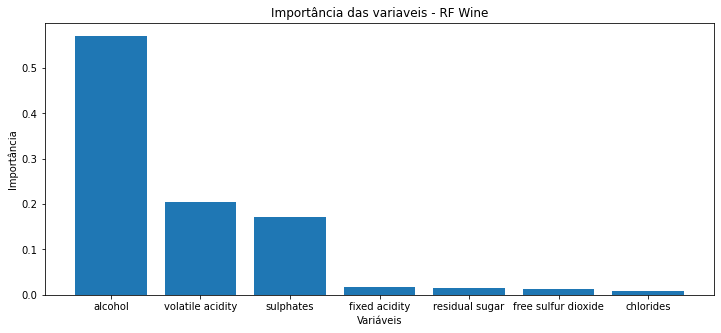

In [82]:
plt.figure(figsize= (12,5))
plt.xticks(range(len(imp)), imp['Variáveis'])
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title("Importância das variaveis - RF Wine")
plt.bar(range(len(imp)), imp['Importância']);

In [83]:
# Retreinando o modelo apenas com as variáveis mais importantes

wine2 = wine.loc[:,["alcohol","sulphates", "volatile acidity", "quality"]]

xWine2 = wine2.drop('quality', axis = 1)
yWine2 = wine2['quality']

xTrainW2, xTestW2, yTrainW2, yTestW2 = train_test_split(xWine2, yWine2, test_size = 0.50, random_state=42)

In [84]:
rfW2 = RandomForestRegressor (bootstrap = True,
                               criterion = 'mse', max_depth = 3, max_features = 'auto',
                               min_samples_leaf = 1, min_samples_split = 2,
                                n_estimators = 1000, n_jobs = 5, oob_score = True)
rfW2.fit(xTrainW2, yTrainW2)


predTrainW2 = rfW2.predict(xTrainW2)
predTestW2 = rfW2.predict(xTestW2)

In [85]:
MAEtrainW2= metrics.mean_absolute_error(yTrainW2, predTrainW2)
R2trainW2 = metrics.r2_score(yTrainW2, predTrainW2)
RMSEtrainW2 = sqrt(metrics.mean_squared_error(yTrainW2, predTrainW2))

print("----- Avaliação do treinamento 2 -----")
print("MAE: ", round(MAEtrainW2, 2))
print("R2: ", round(R2trainW2, 2))
print("RMSE: ", round(RMSEtrainW2, 2))

----- Avaliação do treinamento 2 -----
MAE:  0.49
R2:  0.41
RMSE:  0.62


In [86]:
print("A qualidade média de vinho da base e: ")
print(round(yTestW2.mean(),2))
print()
print("O percentual do MAE em relação à média da base: ")
print(round(metrics.mean_absolute_error(yTestW2, predTestW2)/yTestW2.mean()*100,2),"%")

A qualidade média de vinho da base e: 
5.65

O percentual do MAE em relação à média da base: 
9.26 %


# RF para treinamento de regressão - Utilizando CC

In [88]:
rfCC = RandomForestClassifier (bootstrap = True,
                               criterion = 'gini', max_depth = 3, max_features = 'auto',
                               min_samples_leaf = 1, min_samples_split = 2,
                                n_estimators = 1500, n_jobs = 5, oob_score = True)

rfCC.fit(xTrainCC, yTrainCC)

RandomForestClassifier(max_depth=3, n_estimators=1500, n_jobs=5, oob_score=True)

In [90]:
predTrainCC = rfCC.predict(xTrainCC)
predTestCC = rfCC.predict(xTestCC)


In [91]:
# Calculando a ROC e o Gini - Treinamento
fprTrainCC, tprTrainCC, thresholdsTrainCC = roc_curve(yTrainCC, predTrainCC)
roc_auc_trainCC = auc(fprTrainCC, tprTrainCC)

print('AUC - Treinamento : %f' % roc_auc_trainCC)
print("Gini - Treinamento: ", round(2*roc_auc_trainCC-1,2))
print()

# Calculando a ROC e o Gini - Treinamento
fprTestCC, tprTestCC, thresholdsTestCC = roc_curve(yTestCC, predTestCC)
roc_auc_testCC = auc(fprTestCC, tprTestCC)

print('AUC - Treinamento : %f' % roc_auc_testCC)
print("Gini - Treinamento: ", round(2*roc_auc_testCC-1,2))

AUC - Treinamento : 0.880566
Gini - Treinamento:  0.76

AUC - Treinamento : 0.875586
Gini - Treinamento:  0.75


In [92]:
impCC = pd.DataFrame({'Variáveis' : xTrainCC.columns, 'Importância' : rfCC.feature_importances_})

print(impCC.sort_values(by=['Importância'], ascending = False))

   Variáveis  Importância
7       var9     0.381392
9      var11     0.147123
6       var8     0.122132
12     var14     0.103248
8      var10     0.094576
4       var6     0.046501
1       var3     0.044283
5       var7     0.013691
13     var2X     0.013553
2       var4     0.011055
3       var5     0.010005
11     var13     0.006659
10     var12     0.003644
0       var1     0.002138


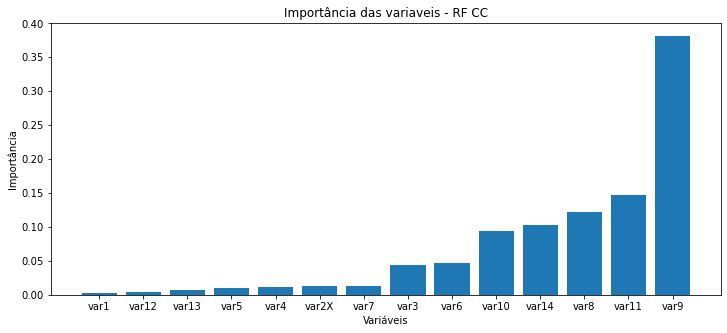

In [94]:
impCC = impCC.sort_values(by=['Importância'])
plt.figure(figsize= (12,5))
plt.xticks(range(len(impCC)), impCC['Variáveis'])
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title("Importância das variaveis - RF CC")
plt.bar(range(len(impCC)), impCC['Importância']);

In [ ]:
#ECERCÍCIO - Treinar apenas com as variáveis mais importantes

In [95]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [96]:
arvore = rfCC.estimators_[42]
# Ao chamar essa função, consultamos apenas uma das árvores de decisão de toda a floresta

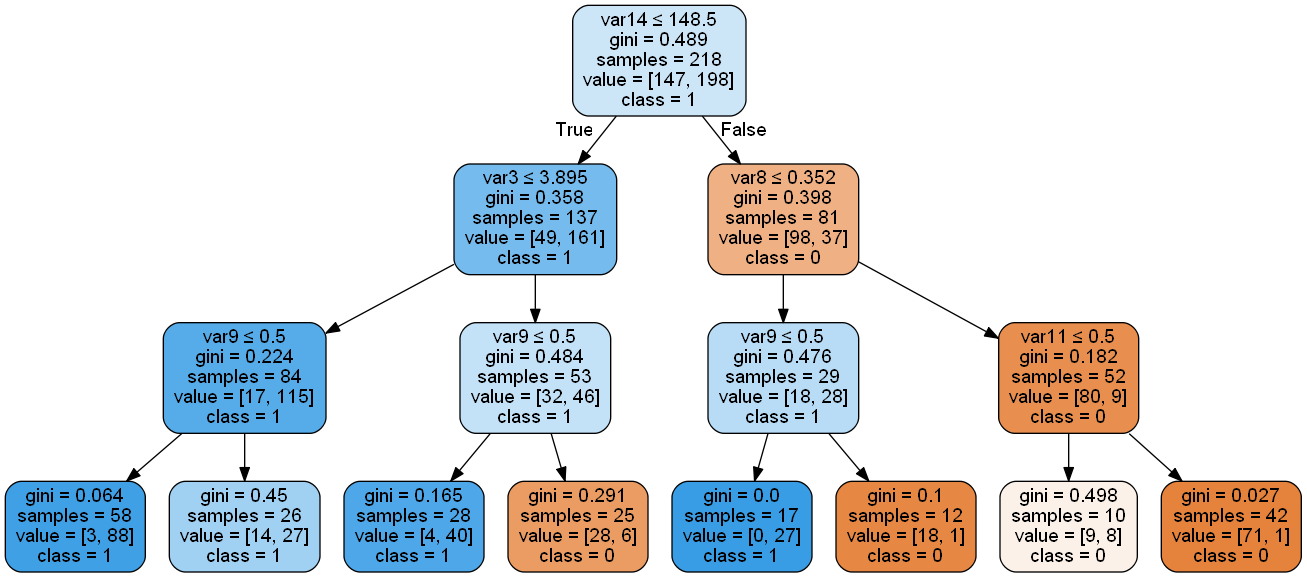

In [98]:
from six import StringIO #from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(arvore
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = baseCC.columns[0:14]
                , class_names = ['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())